# Importing Liberaries

In [1]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

from tensorflow import set_random_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Data Pre-Processing

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


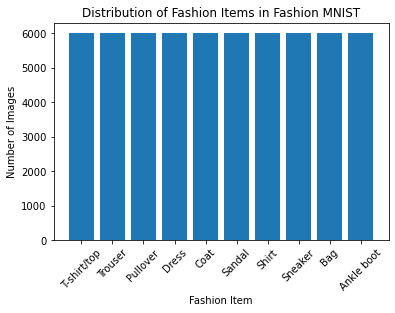

In [3]:
classes = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

# Count the occurrences of each class label in the training data
class_counts = {}
for label in y_train:
  if label in class_counts:
    class_counts[label] += 1
  else:
    class_counts[label] = 1

# Create a bar chart to visualize the distribution
bars = plt.bar(classes, class_counts.values())

plt.xlabel("Fashion Item")
plt.ylabel("Number of Images")
plt.title("Distribution of Fashion Items in Fashion MNIST")
plt.xticks(rotation=45)
plt.show()

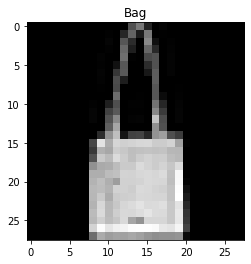

In [4]:
n=200
plt.imshow(x_train[n], cmap="gray")
plt.title(classes[y_train[n]])
plt.show()

In [5]:
# Reshape
x_train = x_train.reshape(60000, 784).astype("float32")
x_test = x_test.reshape(10000, 784).astype("float32")

# Normalize to range [0, 1]
x_train = x_train/255.0
x_test = x_test/255.0

# One-hot encode labels
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

# Model Building

In [6]:
random_state = 42
np.random.seed(random_state)
set_random_seed(random_state)

model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=200,activation="relu"))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(units=10, activation = "softmax"))

# Learning rate schedule function
def learning_rate_schedule(epoch):
  # Initial learning rate
  initial_lr = 0.1
  # Decrease factor after every n epochs
  decay_factor = 0.5
  # Decay every n epochs
  decay_step = 12

  lr = initial_lr * (decay_factor**(epoch // decay_step))
  return lr

learning_rate_scheduler_callback = LearningRateScheduler(learning_rate_schedule)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)

model.compile(optimizer=SGD(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


model.fit(x=x_train, y=y_train_ohe, 
          epochs=100, 
          validation_data=(x_test, y_test_ohe), 
          batch_size=500, 
          callbacks=[learning_rate_scheduler_callback, early_stopping])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 7us/sample - loss: 0.6435 - acc: 0.7807 - val_loss: 0.7744 - val_acc: 0.8315
Epoch 2/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4656 - acc: 0.8359 - val_loss: 0.5410 - val_acc: 0.8383
Epoch 3/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.4231 - acc: 0.8500 - val_loss: 0.4323 - val_acc: 0.8562
Epoch 4/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.3963 - acc: 0.8582 - val_loss: 0.3995 - val_acc: 0.8585
Epoch 5/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.3782 - acc: 0.8658 - val_loss: 0.3888 - val_acc: 0.8622
Epoch 6/100
60000/60000 [==============================] - 0s 5us/sample - loss: 0.3659 - acc: 0.8696 - val_loss: 0.3911 - val_acc: 0.8636
Epoch 7/100
60000/60000 [==========

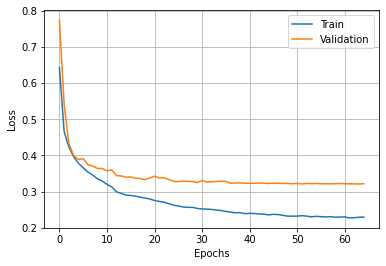

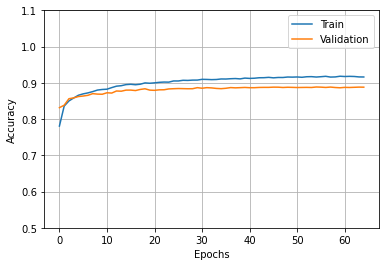

In [7]:
history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

train_acc= history["acc"]
val_acc= history["val_acc"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [8]:
# Evaluate model on validation set
loss, accuracy = model.evaluate(x_test, y_test_ohe)
print('Final Validation Accuracy:', round(accuracy,4), 'and Final Validation Loss:', round(loss,4))

10000/10000 [==============================] - 0s 28us/sample - loss: 0.3224 - acc: 0.8885
Final Validation Accuracy: 0.8885 and Final Validation Loss: 0.3224
